In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/sakshighatge/Desktop/mymoviedb.csv",lineterminator='\n')
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [4]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
df.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url\r          object
dtype: object

In [6]:
df['Vote_Average'].unique()

array(['8.3', '8.1', '6.3', '7.7', '7.0', '6.6', '6.8', '5.3', '7.2',
       '5.9', '7.3', '7.1', '5.1', '4.6', '6.0', '8.2', '5.4', '6.1',
       '8.4', '6.9', '5.8', '7.4', '7.8', '8.0', '6.2', '6.7', '7.6',
       '8.6', '4.8', '5.5', '7.9', '6.4', '7.5', '5.7', '2.2', '6.5',
       '0.0', '5.6', '5.2', '5.0', '8.5', '3.5', '4.0', '3.3', '4.7',
       '4.2', '4.3', '2.0', '4.1', '4.9', '8.7', '4.5', '9.1', '4.4',
       '3.6', nan, 'Animation', '2.8', '3.9', '3.8', '9.0', '3.0', '3.1',
       '3.7', '3.4', '8.9', '2.9', '8.8', '3.2', '1.5', '9.2', '2.5',
       '1.8', '2.4', '2.6', '10.0'], dtype=object)

In [7]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [8]:
df.duplicated().sum()

0

In [9]:
df['Vote_Average'].isnull().sum()

11

In [10]:
df['Vote_Count'].unique()

array(['8940', '1151', '122', ..., '2395', '960', '1319'], dtype=object)

In [11]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

In [12]:
df.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url\r          object
dtype: object

In [13]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [14]:
df.duplicated().sum()

0

In [15]:
# Exploration Summary
# 1.we have a data frame consisting of 9827 rows and 9 columns.
# 2.our dataset looks a bit tidy with no NaNs nor duplicated values.
# 3.Release Date column needs to be casted into date time and to extract only the year value.
# 4.Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
# 5.there is noticeable outliers in Popularity column.
# 6Vote_Average better be categorised for proper analysis.
# 7.Genre column has comma separated values and white spaces that needs to be handled and casted into category.

In [16]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [45]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

AttributeError: Can only use .dt accessor with datetimelike values

In [47]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [49]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')  # Convert to datetime
df['Release_Date'] = df['Release_Date'].dt.year  # Extract year
df['Release_Date'] = df['Release_Date'].fillna(0).astype('int32')  # Convert to int32, handling NaNs

In [51]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [53]:
# Dropping the column
cols=['Overview','Original_Language','Poster_Url\r']

In [55]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [57]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


In [59]:
# categorizing Vote_Average column
# We would cut the Vote_Average values and make 4 categories: 
# popular 
# average 
# below_avg 
# not_popular 

# to describe it more provided above.

In [61]:
def categorize_col(df,col,labels):
    
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
     
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

In [63]:
labels=['not_popular','below_average','average','popular']

categorize_col (df,'Vote_Average',labels)

df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [65]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_average,Thriller
3,2021,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [67]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [69]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [71]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_average,Thriller
3,2021,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [73]:
# we will split genres into list and then explore our dataframe to have only one genre per row for each movie
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


In [75]:
# casting column into category
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 749.6+ KB


In [79]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [81]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


In [83]:
# Data Visualization

In [85]:
sns.set_style('whitegrid')

In [87]:
# q1. What is the most frequent genre of movie released on Netflix?

In [89]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

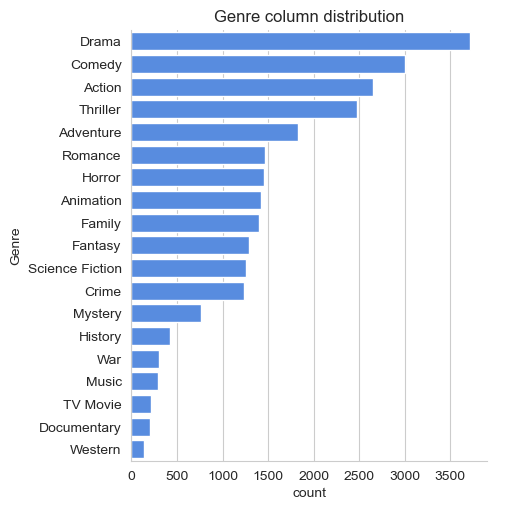

In [91]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,
            color= '#4287f5'
           )
plt.title('Genre column distribution')
plt.show()

In [ ]:
# q2 Which has highest vote in vote avg column?

In [93]:
df['Vote_Average'].describe()

count       25551
unique          4
top       average
freq         6612
Name: Vote_Average, dtype: object

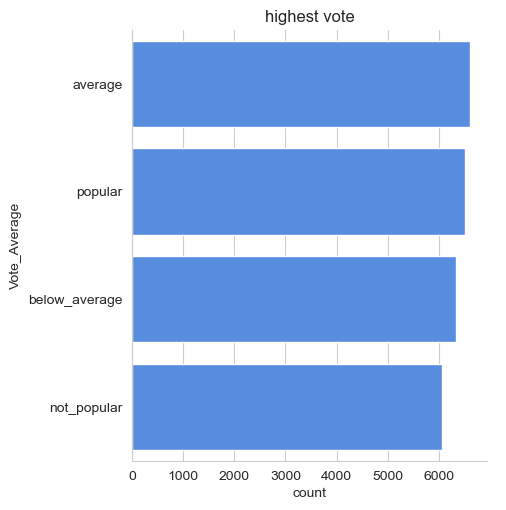

In [112]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,
            color= '#4287f5'
           )
plt.title('highest vote')
plt.show()
            

In [ ]:
# q3 What movies got the highest popularity?what is its genre?

In [118]:
df['Popularity'].describe()

count    25551.000000
mean        41.972953
std        113.760723
min         13.354000
25%         16.363000
50%         21.844000
75%         36.461000
max       5083.954000
Name: Popularity, dtype: float64

In [120]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure


In [124]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


In [ ]:
# q4 What movies got the lowest popularity?what is its genre?

In [126]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984,Threads,13.354,186.0,popular,War
25549,1984,Threads,13.354,186.0,popular,Drama
25550,1984,Threads,13.354,186.0,popular,Science Fiction


In [ ]:
# q5 which yr has most filmed movies

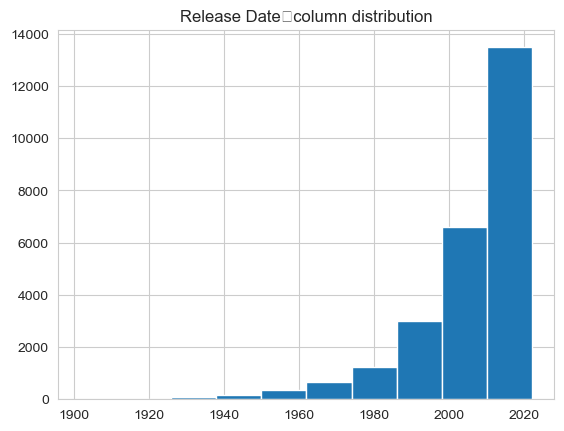

In [130]:
df['Release_Date'].hist()
plt.title('Release Date	column distribution')
plt.show()